<a href="https://colab.research.google.com/github/HarshitCodex/DL-ML_Projects/blob/master/Housing_Price_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("sample_data"))

# Any results you write to the current directory are saved as output.

['anscombe.json', 'README.md', 'test.csv', 'train.csv', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv', 'mnist_train_small.csv']


In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 4.5MB/s 
    100% |████████████████████████████████| 3.6MB 7.6MB/s 
    100% |████████████████████████████████| 496.4MB 36kB/s 
    100% |████████████████████████████████| 1.5MB 5.3MB/s 
    100% |████████████████████████████████| 61kB 14.7MB/s 
    100% |████████████████████████████████| 48.5MB 894kB/s 
    100% |████████████████████████████████| 81kB 23.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built bcolz feather-format
mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post2

In [0]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [0]:
path='sample_data/'
!ls {path}

anscombe.json		      mnist_test.csv	     test.csv
california_housing_test.csv   mnist_train_small.csv  train.csv
california_housing_train.csv  README.md


In [0]:
df_raw=pd.read_csv(f'{path}train.csv')

In [0]:
df_raw.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [0]:
df_raw.SalePrice=np.log(df_raw.SalePrice)
df_raw.SalePrice.head

<bound method NDFrame.head of 0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.88448

In [0]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [0]:
train_cats(df_raw)

In [0]:
df,y,nas=proc_df(df_raw,'SalePrice',max_n_cat=5)

In [0]:
df.shape

(1460, 188)

In [0]:
df_raw.shape

(1460, 81)

In [0]:
df_trn,y_trn,nas=proc_df(df_raw,'SalePrice')

In [0]:
def split_vals(a,n):return a[:n].copy(), a[n:].copy()
n_valid=200
n_trn=len(df_trn)-n_valid
X_train,X_valid=split_vals(df_trn,n_trn)
y_train,y_valid=split_vals(y_trn,n_trn)
raw_train,raw_valid=split_vals(df_raw,n_trn)

In [0]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
cols=df_trn.columns

In [0]:
m=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features=0.5,n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.07728779626310527, 0.1535949559284973, 0.9628298544466133, 0.8443485907040089, 0.8687925892118863]


In [0]:
#using parallel processing
def get_preds(t): return t.predict(X_valid)
%time preds=np.stack(parallel_trees(m,get_preds))
np.mean(preds[:,0]),np.std(preds[:,0])

CPU times: user 28.6 ms, sys: 41.1 ms, total: 69.7 ms
Wall time: 116 ms


(12.127435943607221, 0.07369061579913415)

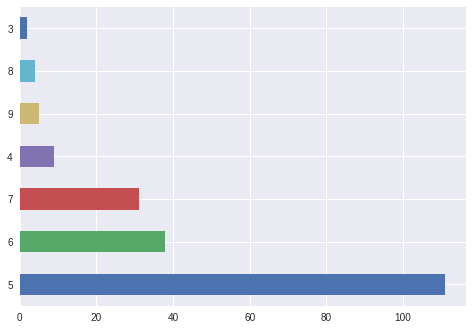

In [0]:
x=raw_valid.copy()
x['pred_std']=np.std(preds,axis=0)
x['pred']=np.mean(preds,axis=0)
x.OverallCond.value_counts().plot.barh();

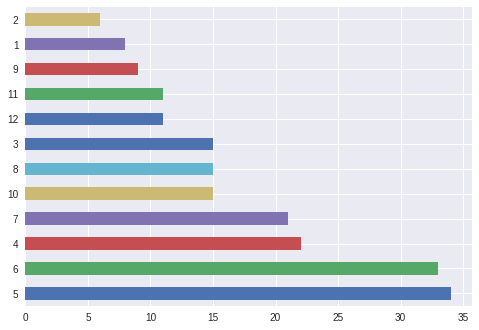

In [0]:
x=raw_valid.copy()
x['pred_std']=np.std(preds,axis=0)
x['pred']=np.mean(preds,axis=0)
x.MoSold.value_counts().plot.barh();

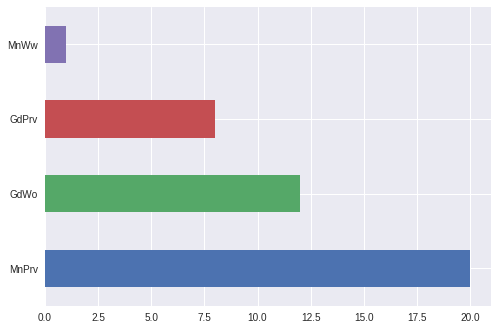

In [0]:
raw_valid.Fence.value_counts().plot.barh()

In [0]:
flds=['OverallCond','SalePrice','pred','pred_std']
enc_summ=x[flds].groupby('OverallCond',as_index=False).mean()
enc_summ

,OverallCond,SalePrice,pred,pred_std
0,3,11.468797,11.587949,0.235833
1,4,11.418422,11.613958,0.218337
2,5,12.149712,12.179882,0.136631
3,6,11.867814,11.859222,0.165445
4,7,11.943916,11.882698,0.172342
5,8,12.035681,11.922780,0.160609
6,9,12.200382,12.098012,0.169922


In [0]:
fi=rf_feat_importance(m,df_trn)
fi

,cols,imp
17,OverallQual,0.376153
46,GrLivArea,0.127926
19,YearBuilt,0.067656
61,GarageCars,0.057303
38,TotalBsmtSF,0.048968
27,ExterQual,0.037695
62,GarageArea,0.030022
43,1stFlrSF,0.026347
34,BsmtFinSF1,0.019216
4,LotArea,0.017012


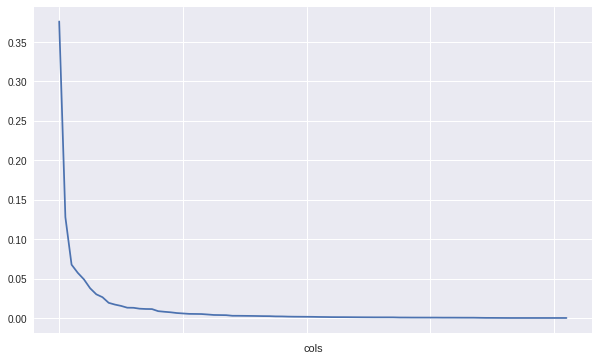

In [0]:
fi.plot('cols','imp',figsize=(10,6),legend=False);

In [0]:
def plot_fi(fi):return fi.plot('cols','imp','barh',figsize=(12,7),legend=False)

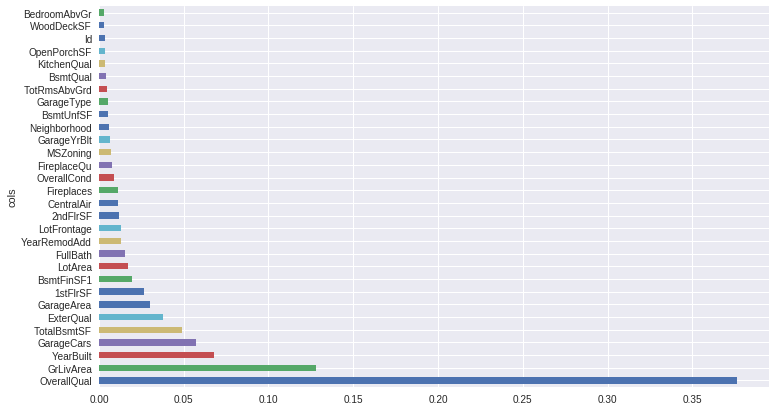

In [0]:
plot_fi(fi[:30])

In [0]:
to_keep=fi[fi.imp>0.0025].cols;
len(to_keep)

32

In [0]:
df_keep=df_trn[to_keep].copy();
X_train,X_valid=split_vals(df_keep,n_trn)

In [0]:
m=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features=0.5,n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.0800689346938318, 0.15530690528360414, 0.9601066493939407, 0.8408595134331379, 0.8688003284228604]


In [0]:
df_trn2,y_trn,nas=proc_df(df_raw,'SalePrice',max_n_cat=3)
X_train,X_valid=split_vals(df_trn2,n_trn)
m=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features=0.6,n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.07584323995480043, 0.1501619908935405, 0.9642063350936649, 0.8512286906770566, 0.8715703633906489]


In [0]:
df_trn2.columns.shape,df_trn.columns.shape

((103,), (83,))

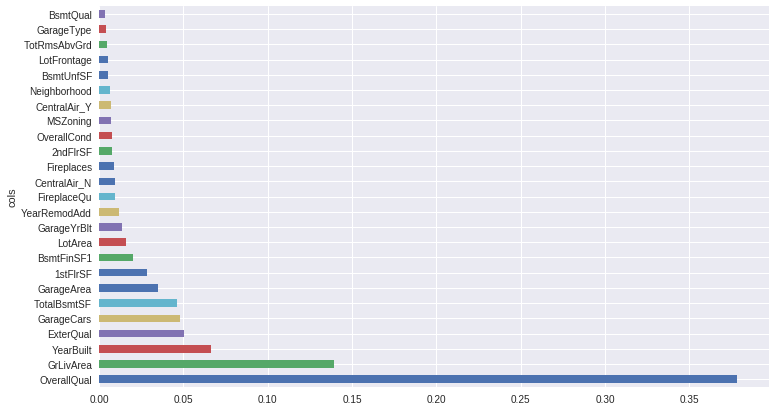

In [0]:
fi=rf_feat_importance(m,df_trn2)
plot_fi(fi[:25])

In [0]:
to_keep=fi[fi.imp>0.003].cols;len(to_keep)

28

In [0]:
df_keep=df_trn2[to_keep].copy()
X_train,X_valid=split_vals(df_keep,n_trn)

In [0]:
from scipy.cluster import hierarchy as hc

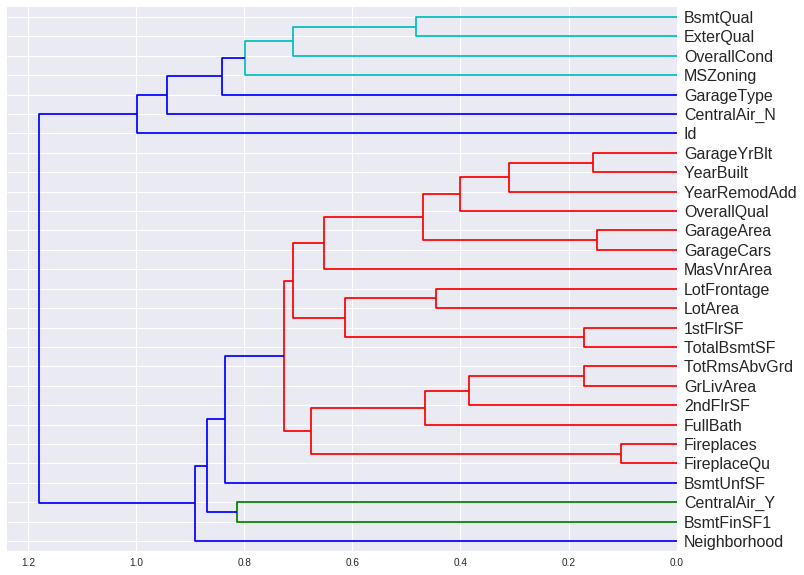

In [0]:
corr=np.round(scipy.stats.spearmanr(df_keep).correlation,4)
corr_condensed=hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed,method='average')
fig=plt.figure(figsize=(12,10))
dendrogram=hc.dendrogram(z,labels=df_keep.columns,orientation='left',leaf_font_size=16)
plt.show()

In [0]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [0]:
get_oob(df_keep)

0.8785243194325689

In [0]:
for c in ('GarageArea','GarageCars','1stFlrSF','TotalBsmtSF','GarageYrBlt','YearBuilt'):
  print(c,get_oob(df_keep.drop(c,axis=1)))

GarageArea 0.8788753796654262
GarageCars 0.877711587557339
1stFlrSF 0.8819276787824788
TotalBsmtSF 0.8763035834542132
GarageYrBlt 0.8788243616953328
YearBuilt 0.8768644664798868


In [0]:
to_drop=['GarageArea','GarageYrBlt','1stFlrSF']
get_oob(df_keep.drop(to_drop,axis=1))

0.8800936928921945

In [0]:
df_keep.drop(to_drop,axis=1,inplace=True)
X_train,X_valid=split_vals(df_keep,n_trn)

In [0]:
np.save('sample_data/keep_cols.npy',np.array(df_keep.columns))

In [0]:
keep_cols=np.load('sample_data/keep_cols.npy')
df_keep=df_trn[keep_cols]

KeyError: ignored

In [0]:
 reset_rf_samples()

In [0]:
get_oob(df_keep)

0.8797914812068746

In [0]:
!pip3 install pdpbox
!pip3 install plotnine

    100% |████████████████████████████████| 57.7MB 592kB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
    100% |████████████████████████████████| 10.1MB 4.7MB/s 
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


In [0]:
from pdpbox import pdp
from plotnine import *

[autoreload of pandas failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'is_extension_array_dtype'
]
[autoreload of pandas._libs failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'iNaT'
]
[autoreload of pandas._libs.tslibs failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
TypeError: C function pandas._libs.tslibs.timedeltas.cast_from_unit has wrong signature (expected __pyx_t_5numpy_int64_t (PyObject *, PyObject *), got __pyx_t_5numpy_int64_t (PyObject *, PyObject *, int __pyx_skip_dispatch))
]
[autoreload of pand

AttributeError: ignored